Total Revenue: $25,368.28
Total Customers: 100
Average Order Value: $253.68
Retention Rate: 91.00%
Churn Rate: 9.00%


C:\Users\Onyi\AppData\Local\Temp\ipykernel_11868\249351099.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='viridis')


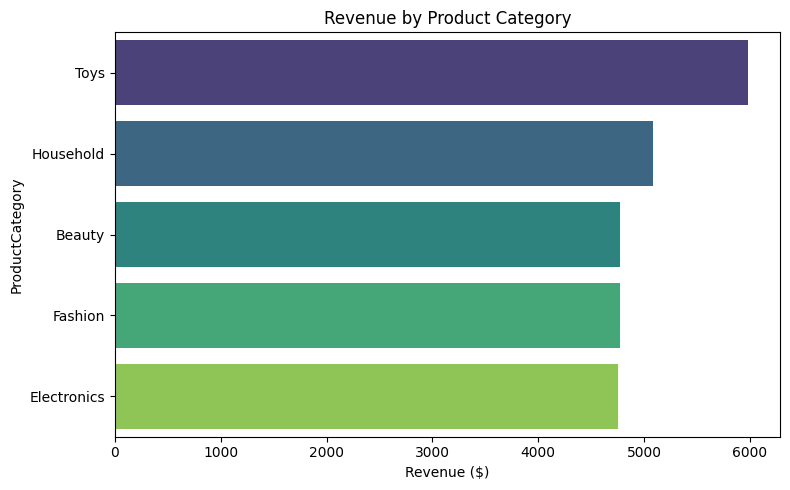

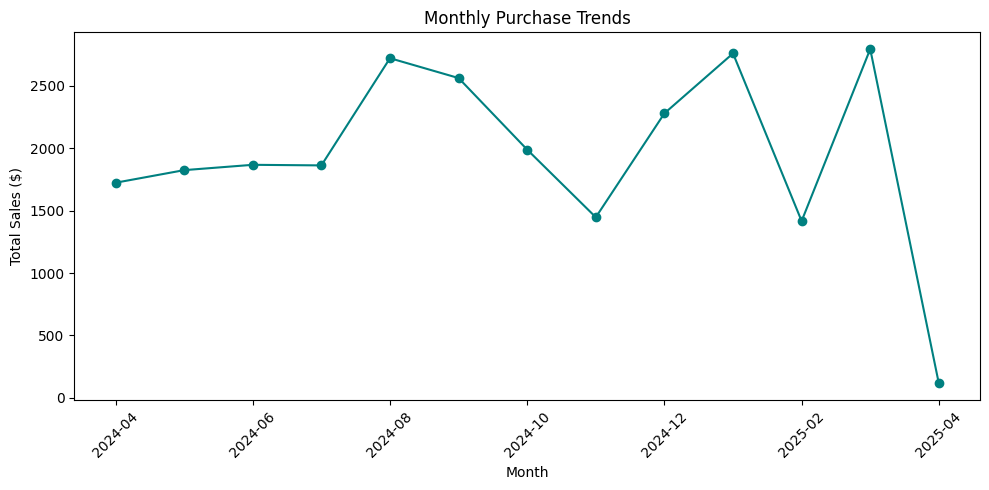

C:\Users\Onyi\AppData\Local\Temp\ipykernel_11868\249351099.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='coolwarm')


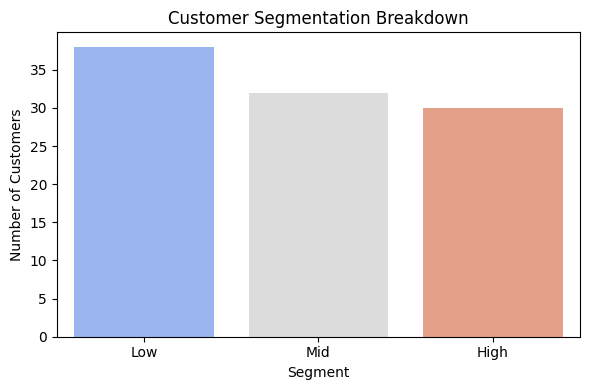

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load dataset
df = pd.read_csv('../data/e-commerce_data.csv', parse_dates=['PurchaseDate'])


# -------------------- Basic Metrics --------------------
total_revenue = df['OrderValue'].sum()
total_customers = df['CustomerID'].nunique()
average_order_value = df['OrderValue'].mean()

# Assume retention: frequency > 1 means retained
retained_customers = df[df['PurchaseFrequency'] > 1]['CustomerID'].nunique()
retention_rate = retained_customers / total_customers
churn_rate = 1 - retention_rate

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Customers: {total_customers}")
print(f"Average Order Value: ${average_order_value:.2f}")
print(f"Retention Rate: {retention_rate:.2%}")
print(f"Churn Rate: {churn_rate:.2%}")

# -------------------- Revenue by Product Category --------------------
plt.figure(figsize=(8, 5))
category_revenue = df.groupby('ProductCategory')['OrderValue'].sum().sort_values(ascending=False)
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='viridis')
plt.title('Revenue by Product Category')
plt.xlabel('Revenue ($)')
plt.tight_layout()
plt.savefig('../results/Revenue_by_Product_Category.png')
plt.show()

# -------------------- Purchase Trends Over Time --------------------
df['Month'] = df['PurchaseDate'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['OrderValue'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(marker='o', linestyle='-', color='teal')
plt.title('Monthly Purchase Trends')
plt.ylabel('Total Sales ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.savefig('../results/Trends_Over_Time.png')
plt.show()

# -------------------- Customer Segmentation --------------------
segment_counts = df['CustomerSegment'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='coolwarm')
plt.title('Customer Segmentation Breakdown')
plt.ylabel('Number of Customers')
plt.xlabel('Segment')
plt.tight_layout()
plt.savefig('../results/Customer_Segmentation.png')
plt.show()
